In [4]:
import pandas as pd
match = pd.read_csv('Match Info.csv', encoding='latin1') 
player = pd.read_csv('Player Info.csv', encoding='latin1')
team = pd.read_csv('Team Info.csv', encoding='latin1')



In [6]:
match.info()
team.info()
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country           25979 non-null  object
 1   League            25979 non-null  object
 2   Season            25979 non-null  object
 3   Stage             25979 non-null  int64 
 4   Date              25979 non-null  object
 5   Match API ID      25979 non-null  int64 
 6   Home Team API ID  25979 non-null  int64 
 7   Away Team API ID  25979 non-null  int64 
 8   Home Team Goal    25979 non-null  int64 
 9   Away  Team Goal   25979 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 2.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Team API ID               1458 non-null   int64 
 1   Team FIFA API I

In [4]:
!pip install xgboost

Country                       0
League                        0
Season                        0
Stage                         0
Date_x                        0
Match API ID                  0
Home Team API ID              0
Away Team API ID              0
Home Team Goal                0
Away  Team Goal               0
Team API ID                 178
Team FIFA API ID            178
Team Long Name              178
Team Short Name             178
Date_y                      178
Build Up Play Speed         178
Build Up Play Dribbling     178
Build Up Play Passing       178
Chance Creation Passing     178
Chance Creation Crossing    178
Chance Creation Shooting    178
Defence Pressure            178
Defence Aggression          178
Defence Team Width          178
dtype: int64


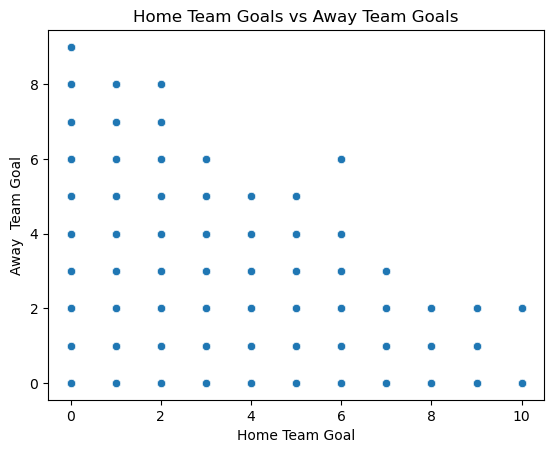

RMSE for Linear Regression: 1.3064078202784002
RMSE for Random Forest: 1.2510154375345355
RMSE for Gradient Boosting: 1.2813351777401758
RMSE for XGBoost: 1.2512347498266656
RMSE for Decision Tree: 1.250985029784905


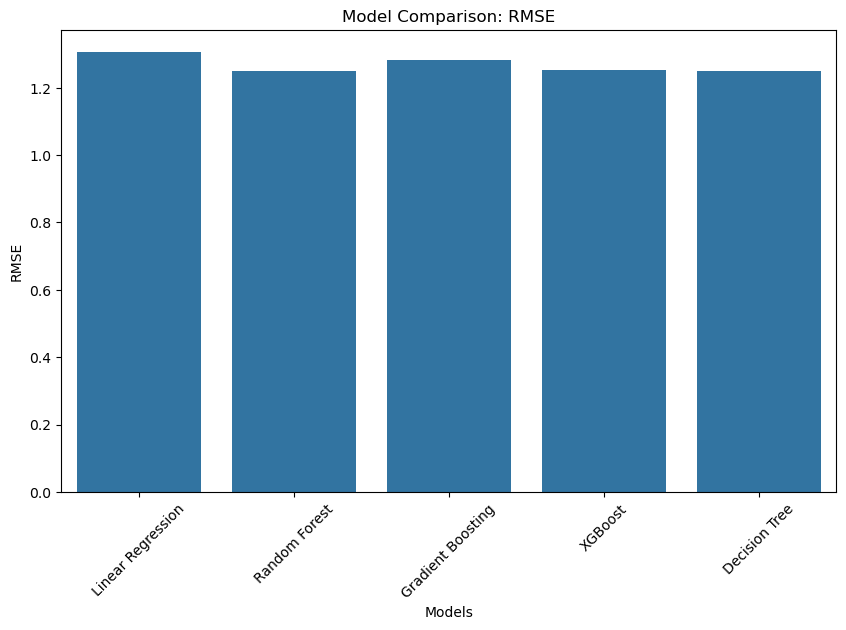

['scaler.pkl']

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import joblib

# Bước 1: Đọc dữ liệu
matches_df = pd.read_csv('Match Info.csv', encoding='latin1')  # dataset 1
teams_df = pd.read_csv('Team Info.csv', encoding='latin1')  # dataset 2

# Bước 2: Kết hợp dữ liệu
data = pd.merge(matches_df, teams_df, left_on='Home Team API ID', right_on='Team API ID', how='left')

# Bước 3: Kiểm tra giá trị NaN
print(data.isnull().sum())

# Bước 4: Xử lý giá trị NaN (loại bỏ hoặc điền giá trị)
data = data.dropna()

# Bước 5: Khám phá dữ liệu
sns.scatterplot(data=data, x='Home Team Goal', y='Away  Team Goal')
plt.title('Home Team Goals vs Away Team Goals')
plt.show()

# Bước 6: Chuẩn bị dữ liệu cho mô hình
# Thêm nhiều đặc trưng
X = data[['Build Up Play Speed', 'Build Up Play Dribbling', 'Build Up Play Passing', 
           'Chance Creation Passing', 'Chance Creation Shooting']]  # Biến đầu vào
y = data['Home Team Goal']  # Dự đoán số bàn thắng của đội nhà

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Bước 7: Huấn luyện nhiều mô hình
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeRegressor()
}

# Lưu trữ RMSE cho từng mô hình
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = rmse
    print(f'RMSE for {name}: {rmse}')

# Bước 8: Trực quan hóa hiệu suất mô hình
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Model Comparison: RMSE')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.show()

# Bước 9: Lưu các mô hình và scaler
for name, model in models.items():
    joblib.dump(model, f'{name.lower().replace(" ", "_")}_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


In [24]:
import joblib
import pandas as pd
import numpy as np

# Tải các mô hình đã lưu
linear_model = joblib.load('linear_regression_model.pkl')
decision_tree_model = joblib.load('decision_tree_model.pkl')
random_forest_model = joblib.load('random_forest_model.pkl')
gradient_boosting_model = joblib.load('gradient_boosting_model.pkl')
xgboost_model = joblib.load('xgboost_model.pkl')

# Tải scaler đã lưu
loaded_scaler = joblib.load('scaler.pkl')

# Tạo dữ liệu mới để dự đoán
# Giả sử dữ liệu mới được tạo với các đặc điểm phù hợp
new_data = pd.DataFrame({
    'Build Up Play Speed': [70, 80, 60],
    'Build Up Play Dribbling': [65, 75, 55],
    'Build Up Play Passing': [72, 82, 62],
    'Chance Creation Passing': [68, 78, 58],
    'Chance Creation Shooting': [74, 84, 64],
})
# Chuẩn hóa dữ liệu mới
new_data_scaled = loaded_scaler.transform(new_data)

# Dự đoán số bàn thắng của đội nhà với từng mô hình
predictions = {
    'Linear Regression': linear_model.predict(new_data_scaled),
    'Decision Tree': decision_tree_model.predict(new_data_scaled),
    'Random Forest': random_forest_model.predict(new_data_scaled),
    'Gradient Boosting': gradient_boosting_model.predict(new_data_scaled),
    'XGBoost': xgboost_model.predict(new_data_scaled)
}

# Hiển thị kết quả dự đoán
for model_name, preds in predictions.items():
    print(f'{model_name} Predictions: {preds}')


Linear Regression Predictions: [1.47735342 1.4599826  1.49472424]
Decision Tree Predictions: [1.96703297 1.15611814 1.6875    ]
Random Forest Predictions: [1.86475864 1.60685432 1.32712298]
Gradient Boosting Predictions: [1.53102456 1.8197407  1.51672058]
XGBoost Predictions: [2.133158  1.8751448 1.375082 ]
